In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv('/content/drive/MyDrive/ml/IEA-EV-dataEV salesHistoricalCars.csv')

In [23]:
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      3798 non-null   object 
 1   category    3798 non-null   object 
 2   parameter   3798 non-null   object 
 3   mode        3798 non-null   object 
 4   powertrain  3798 non-null   object 
 5   year        3798 non-null   int64  
 6   unit        3798 non-null   object 
 7   value       3798 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 237.5+ KB


In [26]:
df = df[df['unit'] != 'percent']

In [28]:
df_pivoted = df.pivot_table(
    index=['region', 'mode', 'powertrain', 'year', 'unit'],
    columns='parameter',
    values='value',
    aggfunc='sum'  # In case of multiple entries, this will aggregate
).reset_index()

# Optional: Rename columns to remove multi-index
df_pivoted.columns.name = None

# Show result
df_pivoted.head()

,region,mode,powertrain,year,unit,EV sales,EV stock,Electricity demand,Oil displacement Mbd,"Oil displacement, million lge"
0,Australia,Cars,BEV,2011,Vehicles,49.0,49.0,NaN,NaN,NaN
1,Australia,Cars,BEV,2012,Vehicles,170.0,220.0,NaN,NaN,NaN
2,Australia,Cars,BEV,2013,Vehicles,190.0,410.0,NaN,NaN,NaN
3,Australia,Cars,BEV,2014,Vehicles,370.0,780.0,NaN,NaN,NaN
4,Australia,Cars,BEV,2015,Vehicles,760.0,1500.0,NaN,NaN,NaN


In [31]:
df_pivoted = df_pivoted[df_pivoted['unit'] == 'Vehicles']

# Make the change inplace by resetting the index of the filtered DataFrame
df_pivoted.reset_index(drop=True, inplace=True)

# Display the first few rows of the updated DataFrame
df_pivoted.head()

,region,mode,powertrain,year,unit,EV sales,EV stock,Electricity demand,Oil displacement Mbd,"Oil displacement, million lge"
0,Australia,Cars,BEV,2011,Vehicles,49.0,49.0,NaN,NaN,NaN
1,Australia,Cars,BEV,2012,Vehicles,170.0,220.0,NaN,NaN,NaN
2,Australia,Cars,BEV,2013,Vehicles,190.0,410.0,NaN,NaN,NaN
3,Australia,Cars,BEV,2014,Vehicles,370.0,780.0,NaN,NaN,NaN
4,Australia,Cars,BEV,2015,Vehicles,760.0,1500.0,NaN,NaN,NaN


In [33]:
df_pivoted.drop(
    columns=['Electricity demand', 'Oil displacement Mbd', 'Oil displacement, million lge'],
    inplace=True
)

# Display the first few rows of the updated DataFrame
df_pivoted.head()

,region,mode,powertrain,year,unit,EV sales,EV stock
0,Australia,Cars,BEV,2011,Vehicles,49.0,49.0
1,Australia,Cars,BEV,2012,Vehicles,170.0,220.0
2,Australia,Cars,BEV,2013,Vehicles,190.0,410.0
3,Australia,Cars,BEV,2014,Vehicles,370.0,780.0
4,Australia,Cars,BEV,2015,Vehicles,760.0,1500.0


In [35]:
final = df_pivoted.dropna()

In [37]:
df_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      1400 non-null   object 
 1   mode        1400 non-null   object 
 2   powertrain  1400 non-null   object 
 3   year        1400 non-null   int64  
 4   unit        1400 non-null   object 
 5   EV sales    1342 non-null   float64
 6   EV stock    1145 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 76.7+ KB


In [38]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1087 entries, 0 to 1399
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      1087 non-null   object 
 1   mode        1087 non-null   object 
 2   powertrain  1087 non-null   object 
 3   year        1087 non-null   int64  
 4   unit        1087 non-null   object 
 5   EV sales    1087 non-null   float64
 6   EV stock    1087 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 67.9+ KB


In [45]:
final_cleaned_path = "/content/drive/MyDrive/ml/finalclean.csv"
final.to_csv(final_cleaned_path, index=False)

final_cleaned_path

'/content/drive/MyDrive/ml/finalclean.csv'

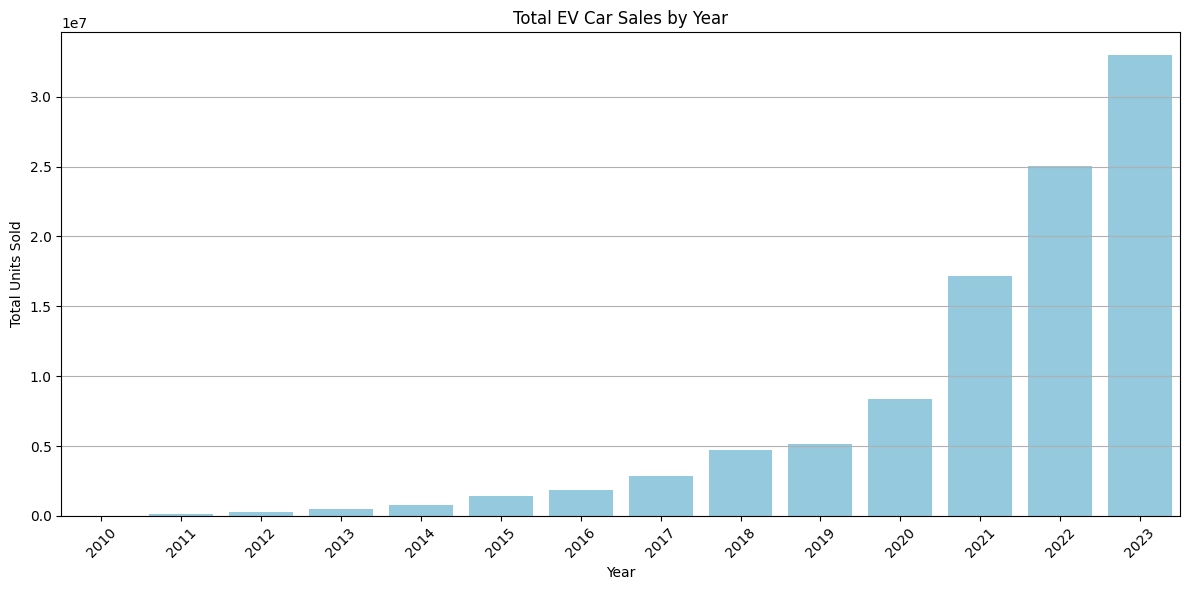

In [41]:
ev_cars = final[final['mode'] == 'Cars']

# Group by year and sum EV sales
sales_by_year = ev_cars.groupby('year')['EV sales'].sum().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_year, x='year', y='EV sales', color='skyblue')
plt.title('Total EV Car Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

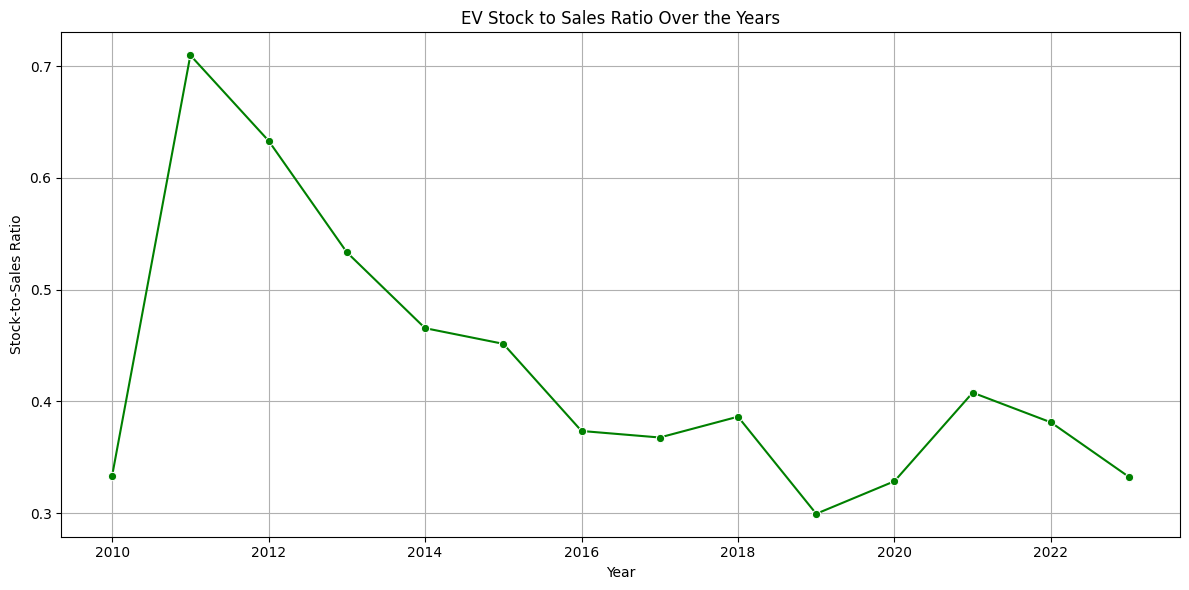

In [42]:
ev_cars = final[final['mode'] == 'Cars']

# Group by year and calculate total EV sales and stock
yearly_data = ev_cars.groupby('year')[['EV sales', 'EV stock']].sum().reset_index()

# Calculate the ratio of stock to sales
yearly_data['Stock-to-Sales Ratio'] = yearly_data['EV sales'] / yearly_data['EV stock']

# Plot the ratio over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_data, x='year', y='Stock-to-Sales Ratio', marker='o', color='green')
plt.title('EV Stock to Sales Ratio Over the Years')
plt.xlabel('Year')
plt.ylabel('Stock-to-Sales Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

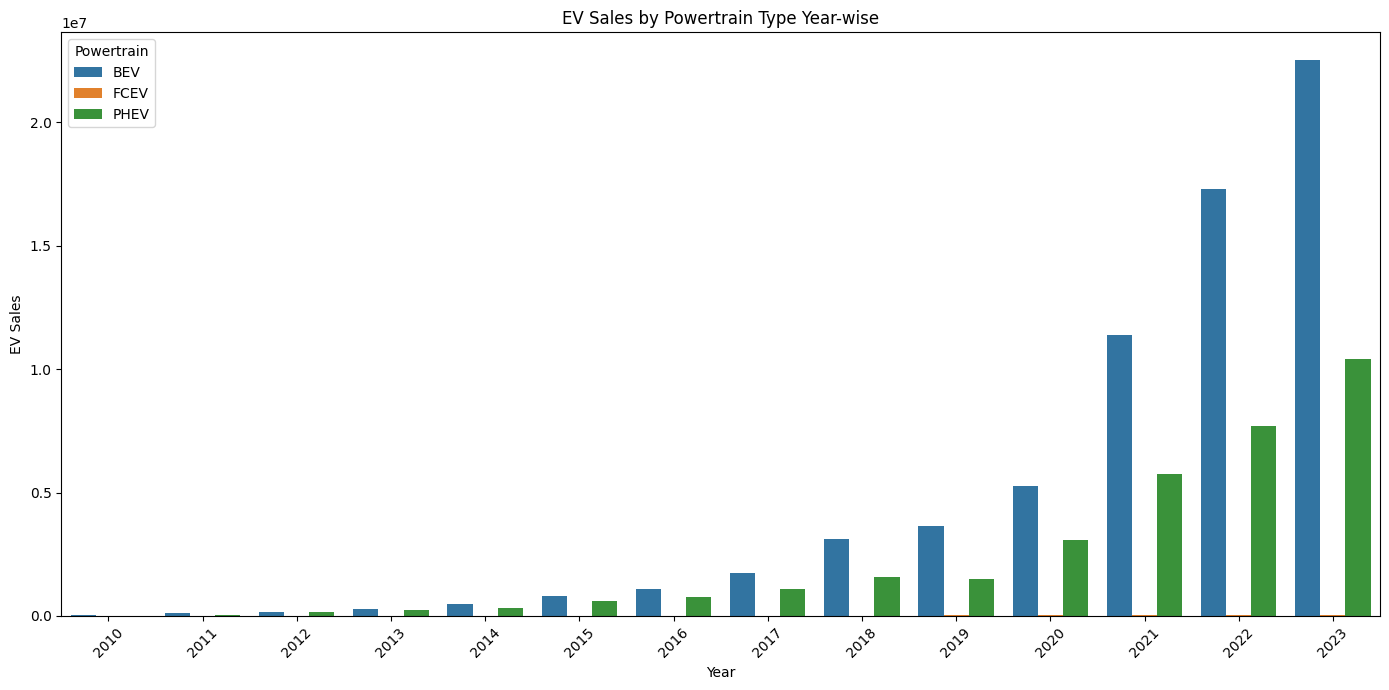

In [43]:
ev_cars = final[final['mode'] == 'Cars']

# Group by year and powertrain, then sum EV sales
sales_by_year_powertrain = ev_cars.groupby(['year', 'powertrain'])['EV sales'].sum().reset_index()

# Plot the grouped bar chart
plt.figure(figsize=(14, 7))
sns.barplot(data=sales_by_year_powertrain, x='year', y='EV sales', hue='powertrain')
plt.title('EV Sales by Powertrain Type Year-wise')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.xticks(rotation=45)
plt.legend(title='Powertrain')
plt.tight_layout()
plt.show()

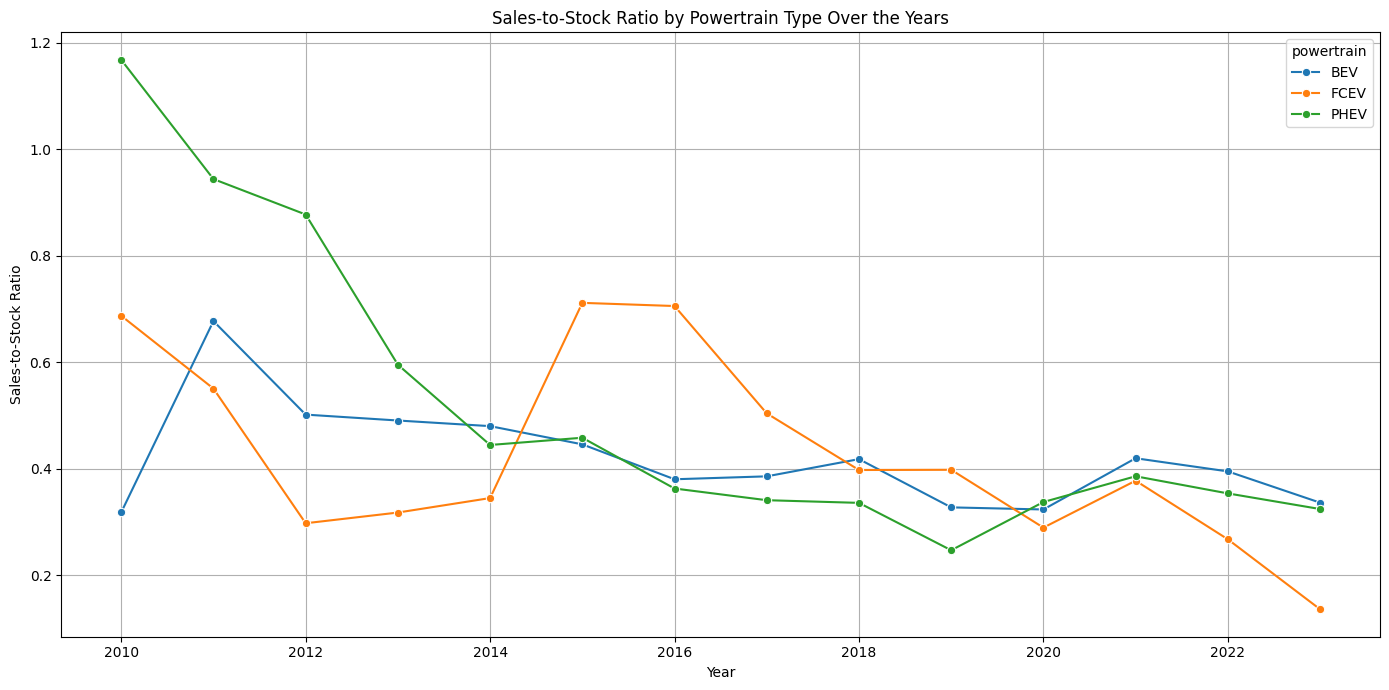

In [44]:
ev_cars = final[final['mode'] == 'Cars']

# Group by year and powertrain, summing EV sales and stock
powertrain_yearly = ev_cars.groupby(['year', 'powertrain'])[['EV sales', 'EV stock']].sum().reset_index()

# Calculate sales-to-stock ratio
powertrain_yearly['Sales-to-Stock Ratio'] = powertrain_yearly['EV sales'] / powertrain_yearly['EV stock']

# Plot the sales-to-stock ratio per year for each powertrain
plt.figure(figsize=(14, 7))
sns.lineplot(data=powertrain_yearly, x='year', y='Sales-to-Stock Ratio', hue='powertrain', marker='o')
plt.title('Sales-to-Stock Ratio by Powertrain Type Over the Years')
plt.xlabel('Year')
plt.ylabel('Sales-to-Stock Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# conclusion

# Analysis of total EV sales
#we conclude that year on year the sales of ev has increased significantly
#Due to increasing sales year on year the production has also increased
#Only in the year 2011 the sales to stock ratio was near to 1 rest in all years it has been very low meaning sales has been significantly low as compared to stockin all ths years.

#analysis category wise
#every year sales of BEV and phev has increased
#in comparison sales of BEV has increased more than Phev
#As 2011 is only year with great stock to sales ratio the major contributing factor of that sales is BEV

#This is what i concluded from analysis